In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import xgboost
import sys
sys.path.append("./skynet/bf/src/scripts/")
import xgboost_ohlc
import utils
import numpy as np
import seaborn as sns
import talib
import datetime
import requests
import time
%matplotlib inline

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 500)
pd.options.display.precision = 10

In [10]:
#5分足ml値幅予想やつ
#戻ってくることを前提に指値ばらまきを一定間隔で仕掛ける

In [40]:
version = '3002'
data_size = 10000
test_size = 1000

In [5]:
five = pd.read_csv('skynet/bf/data/processed/min_five.csv')[-100000:]

In [42]:
five = pd.read_csv('skynet/bf/data/processed/min_five.csv').dropna()
five['Target_Convergence'] = ((five['C/O']-1).abs() < (five['C/O']-1).abs().sort_values().median()).shift(-1).astype(bool)
data_columns = ['MACDS/O','RSI','ATR/O','Time','C/O','O-1/C','H/O','L/O']
target_column = 'Target_Convergence'
backtest_columns = ['Open','timestamp','Target_Close','Target_Open']

five_for_ml = five[data_columns+[target_column]+backtest_columns].dropna()
train = five_for_ml[-data_size:-test_size]
test = five_for_ml[-test_size:]
backtest = five_for_ml[-test_size:]
all_data = five_for_ml[-data_size:]

data_train = train[data_columns]
data_test = test[data_columns]


target_train = train[target_column]
target_test = test[target_column]

xgbc = xgboost_ohlc.c_fit(data_train, target_train)

predict = xgbc.predict(data_test)
print((predict == target_test).mean())

xgbc_all_data = xgboost_ohlc.c_fit(all_data[data_columns],all_data[target_column])

train.to_csv("skynet/bf/model/T_"+version+"/train.csv")
test.to_csv("skynet/bf/model/T_"+version+"/test.csv")
backtest.to_csv("skynet/bf/model/T_"+version+"/backtest.csv")
pickle.dump(xgbc_all_data, open("skynet/bf/model/T_"+version+"/xgbc_"+i+".pickle", "wb"))
with open("skynet/bf/model/T_"+version+"/spec.txt", mode="w") as txt:
    txt.write(str(datetime.datetime.now())+'\n')
    txt.write('data_columns: '+str(data_columns)+"\n")
    txt.write('target_column: '+str(target_column)+"\n")

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   24.5s finished


0.579
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   28.2s finished


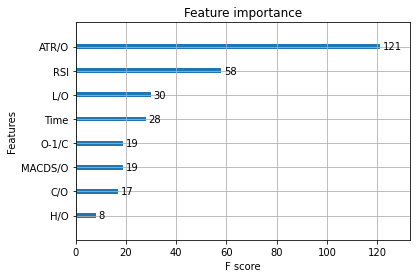

In [44]:
xgboost.plot_importance(xgbc)

In [ ]:
#########################################
#########################################
#########################################

In [ ]:
一分間で60回まで注文できる
低く見積もって３０回とする
bid,ask3幅ずつの12秒に一回注文で

In [3]:
ohlc = utils.get_ohlc(periods=300,datasize=1000,api_key=False)

In [8]:
int(ohlc['timestamp'].diff().mode())

300

In [4]:
c = ['MACDS/O','RSI','ATR/O','Time','C/O','O-1/C','H/O','L/O']
ohlc = utils.shaping_ohlc(ohlc,c)